# Анализ данных и проверка гипотез магазина "Стримчик"

В данном проекте от меня требовалось выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Столбцы датасета games:**
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Импорт необходимых модулей и загрузка датасета

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/datasets/games.csv')

In [4]:
records_count = df.shape[0]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.tail(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.00,0.0,67.0,tbd,E
16696,Breach,PC,2011.0,Shooter,0.01,0.00,0.00,0.0,61.0,5.8,T
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.00,0.0,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.00,0.0,48.0,tbd,E
16699,The Longest 5 Minutes,PSV,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16700,Mezase!! Tsuri Master DS,DS,2009.0,Sports,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16701,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16702,STORM: Frontline Nation,PC,2011.0,Strategy,0.00,0.01,0.00,0.0,60.0,7.2,E10+
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.0,NaN,tbd,E


### Первоначальная обработка данных

#### Приведем названия столбцов в нижний регистр

In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Обработка пропусков и приведение типов данных

- `name` — название игры
- `platform` — платформа
- `year_of_release` — год выпуска
- `genre` — жанр игры
- `na_sales` — продажи в Северной Америке (миллионы проданных копий)
- `eu_sales` — продажи в Европе (миллионы проданных копий)
- `jp_sales` — продажи в Японии (миллионы проданных копий)
- `other_sales` — продажи в других странах (миллионы проданных копий)
- `critic_score` — оценка критиков (максимум 100)
- `user_score` — оценка пользователей (максимум 10)
- `rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [7]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Видим довольно большое количество пропусков в столбцах `year_of_release`, `critic_score`, `user_score`, `raiting`. Пропуски могли возникнуть из-за технических ошибок или в том случае, если опрос касательно оценок конкретной игры никогда не вёлся. Также, мы видим пропуски в столбцах `name` и `genre`. Можем исключить эти значения из выборки, так как заполнить их медианным или средним значением не получится, ибо в данных столбцах хранятся строки и при этом потеря данных при удалении составит 0.02%.

In [8]:
df = df.dropna(subset=['name', 'genre'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Пропуски столбца `year_of_release` также можно исключить, так как медианным или средним значением данный столбец заполнить не получится, только ручной поиск и корректирование данных. При исключении пропусков мы потеряем 1.6% данных.

In [9]:
df = df.dropna(subset=['year_of_release'])

In [10]:
loss_percentage = '{:.2%}'.format((records_count - df.shape[0]) / records_count)
loss_percentage

'1.62%'

Итого, при обработке пропусков мы потеряли 1.62% данных, что укладывается в лимит 5%.

В таблице в столбце `user_score` встречается значение **tbd**, что означает **to be determined** (будет определено). Данное значение говорит о том, что пользовательский рейтинг мог быть собран неккоректно, либо же игра вышла совсем недавно и пользовательский рейтинг ещё не сформировался. Данное значение стоит заменить на **NaN**.

In [11]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Типы данных нужно изменить в столбцах `year_of_release` и `user_score`.
- `year_of_release` - Тип данных нужно поменять на int
- `user_score` - Тип данных нужно поменять на float

In [12]:
df['year_of_release'] = df['year_of_release'].astype('int')
df['user_score'] = df['user_score'].astype('float')

Добавим дополнительный столбец `total_sales`, который будет содержать суммарные продажи по всем регионам.

In [13]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [15]:
df.duplicated().sum()

0

In [16]:
df[df[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


Был найден один неявный дубликат. Можно было бы объединить данные, но по всей видимости, вторая запись является просто ошибкой. Тогда мы можкем удалить все неявные дубликаты, оставив только первую запись в качестве единственно верной.

In [17]:
df.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first', inplace=True)
df[df[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


Теперь неявных дубликатов нет.

In [18]:
df['rating'] = df['rating'].fillna('pass')

**Вывод по первоначальной обработке данных:**

- Все названия колонок были приведены к нижнему регистру
- Было удалено 273 пропуска, что составило 1.62% данных
- Тип столбца `year_of_release` был изменет на **int**
- Тип столбца `user_score` был изменен на **float**
- Была добавлена новая колонка `total_sales`, которая содержит в себе сумму всех продаж по всем регионам
- Пропуски в столбцах `critic_score` и `user_score`на данном этапе восполнить не представляется возможным, так как игра могла выйти недавно и не ещё не набрала достаточное количество отзывов; имела место быть техническая ошибка, которая не позволила корректно загрузить данные; заполнить медианным или средним значением также не представляется возможным, так как на этапе предобработки неизвестна зависимость между данными столбцами.
- Был удалён 1 неявный дубликат
- Все пропуски в столбце `rating` были временно заменены на **pass**

### Исследовательский анализ данных

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

#### Анализ выпуска игр по разным годам

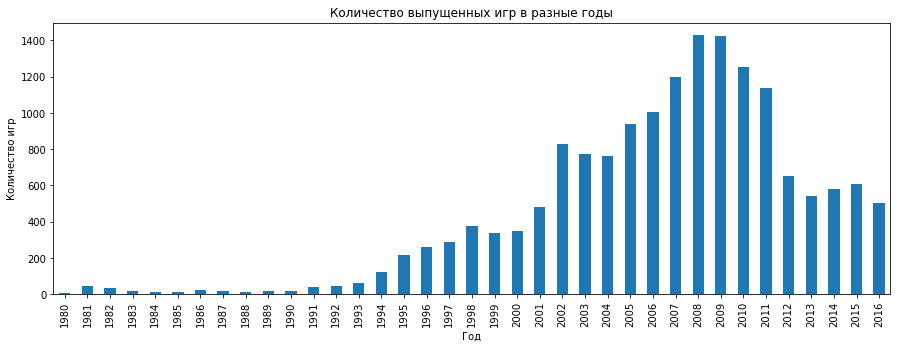

In [19]:
ax = df.groupby('year_of_release')['year_of_release'].count().plot(y='name', kind='bar', figsize=(15, 5))
ax.set_title('Количество выпущенных игр в разные годы')
ax.set_xlabel('Год')
ax.set_ylabel('Количество игр');

На графике видно, что до 1995 года игр выпускалось очень мало. Скорее всего, это связано с малыми мощностями тогдашних систем, плюс сама индустрия видеоигр ещё только зарождалась и не была настолько популярной. Начиная с 2002 года, произошёл резкий скачок в количестве выпускаемых игр, после чего пик держался на промежутке c 2007 по 2011 год. Дальше - спад. На мой взгляд, данные до 1995 года не важны в рамках моего исследования.

#### Анализ продаж по платформам

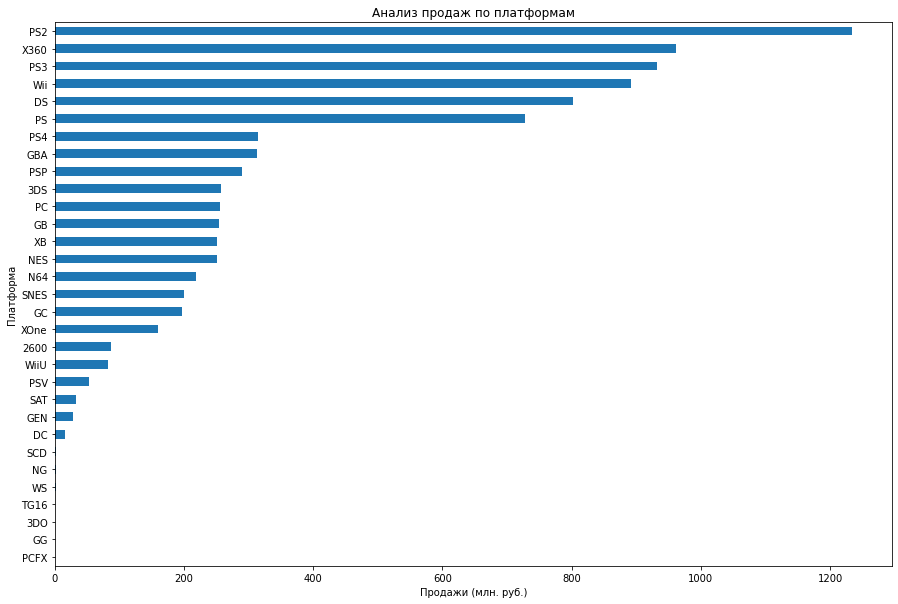

In [20]:
ax = df.groupby('platform')['total_sales'].sum().sort_values().plot(y='total_sales', kind='barh', figsize=(15, 10))
ax.set_title('Анализ продаж по платформам')
ax.set_xlabel('Продажи (млн. руб.)')
ax.set_ylabel('Платформа');

Из графика видно, что самымой продаваемой платформой является **PS2**. Для исследования распределения продаж по кодам я возьму первые 10 самых популярных консолей.

In [21]:
top_10_platform_pivot = df.pivot_table(index='platform', values='total_sales', aggfunc='sum') \
.sort_values(by='total_sales', ascending=False).reset_index().iloc[0:10]
top_10_platform = top_10_platform_pivot['platform']
top_10_platform

0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
6     PS4
7     GBA
8     PSP
9     3DS
Name: platform, dtype: object

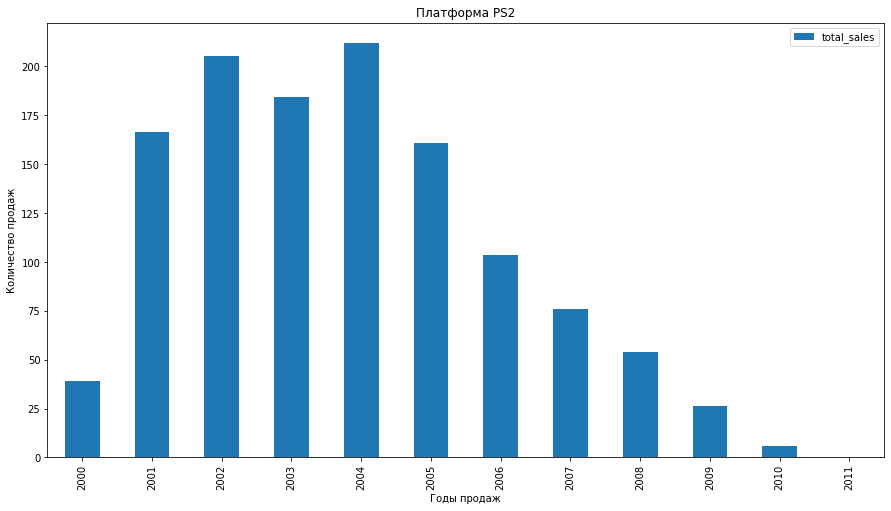

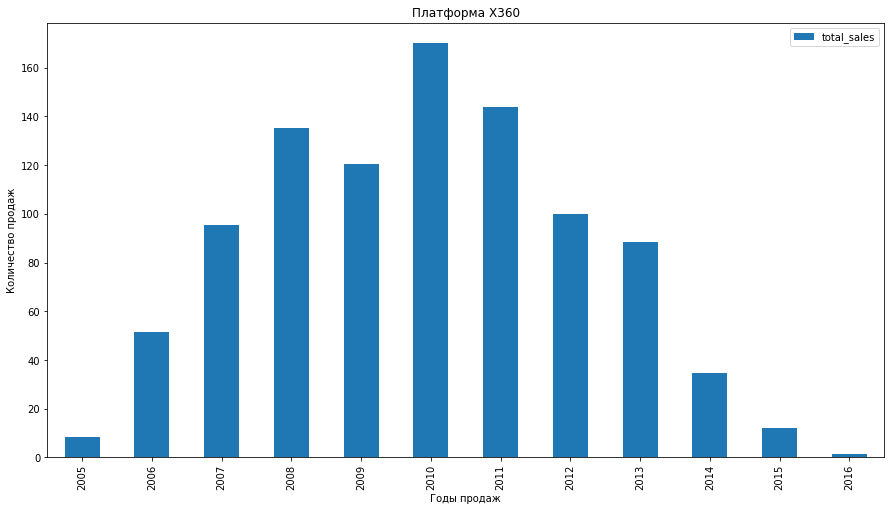

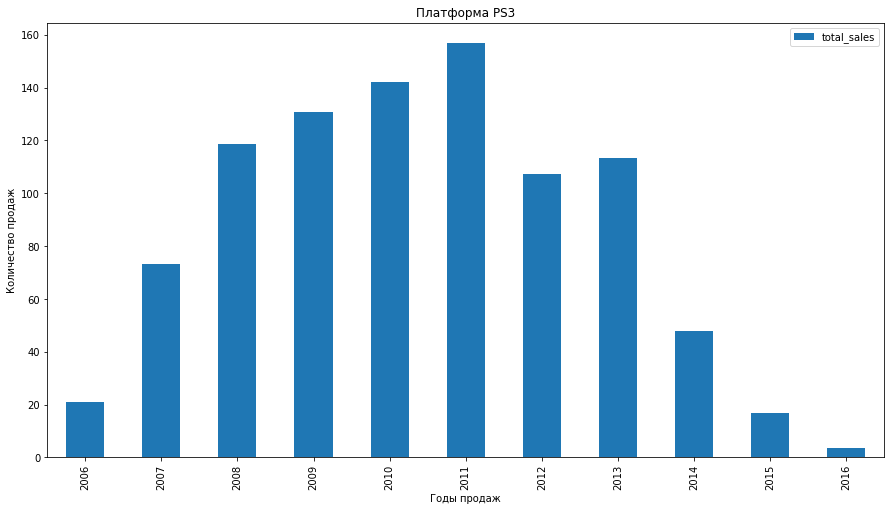

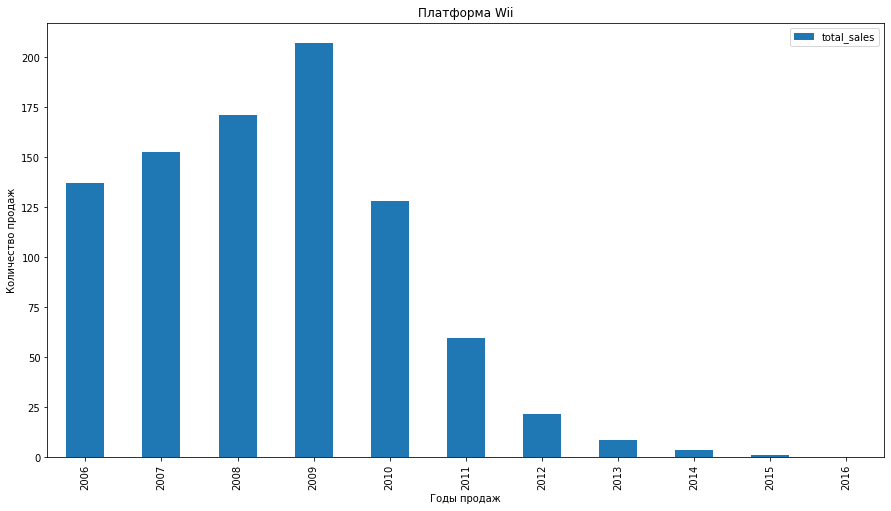

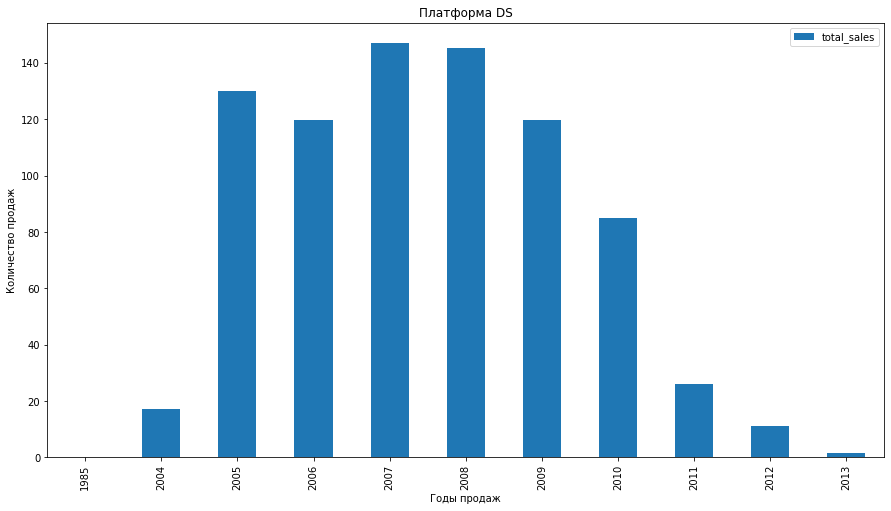

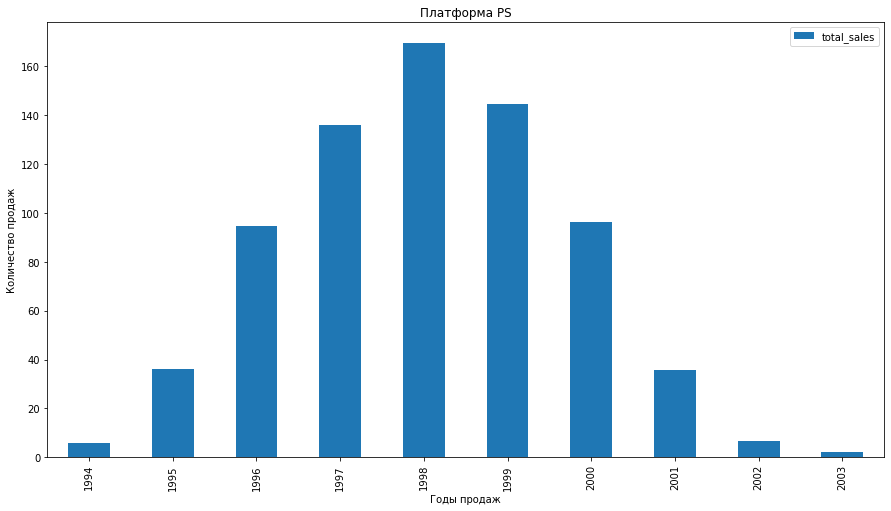

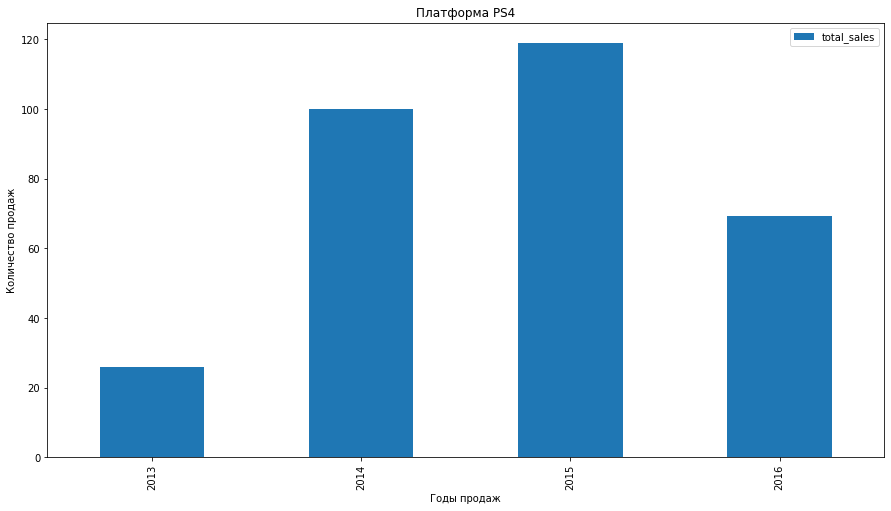

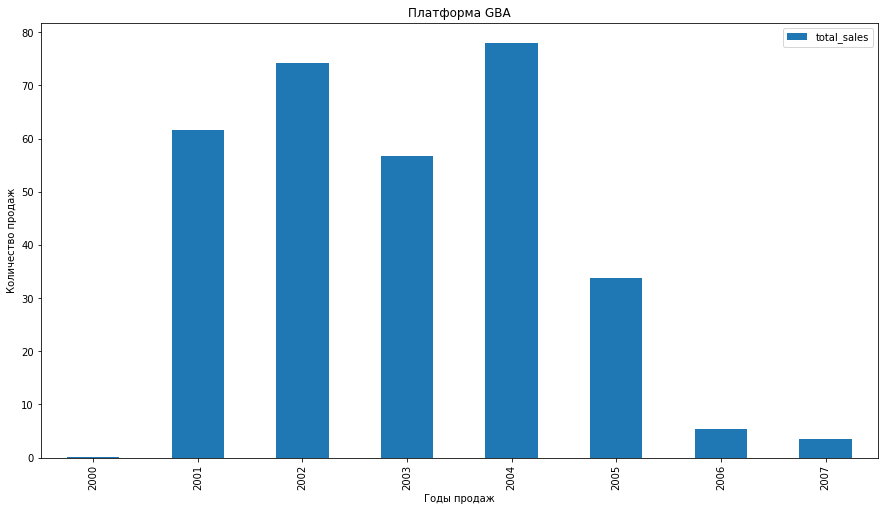

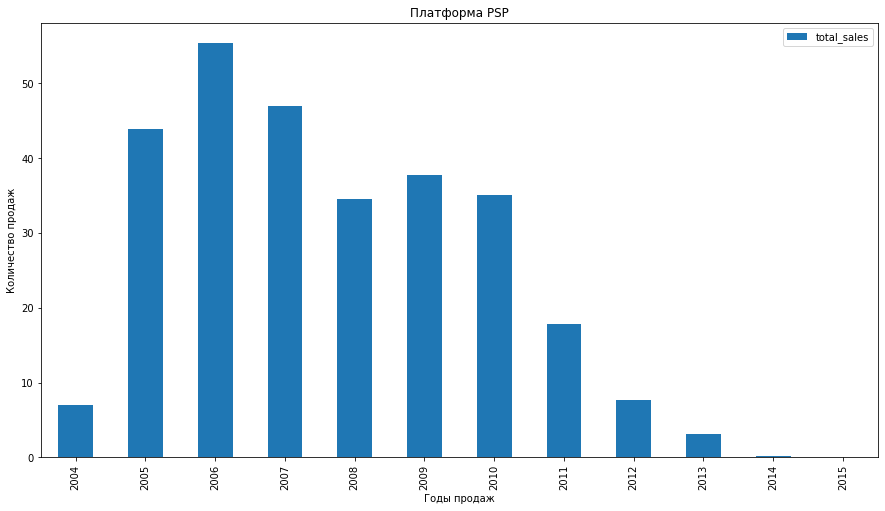

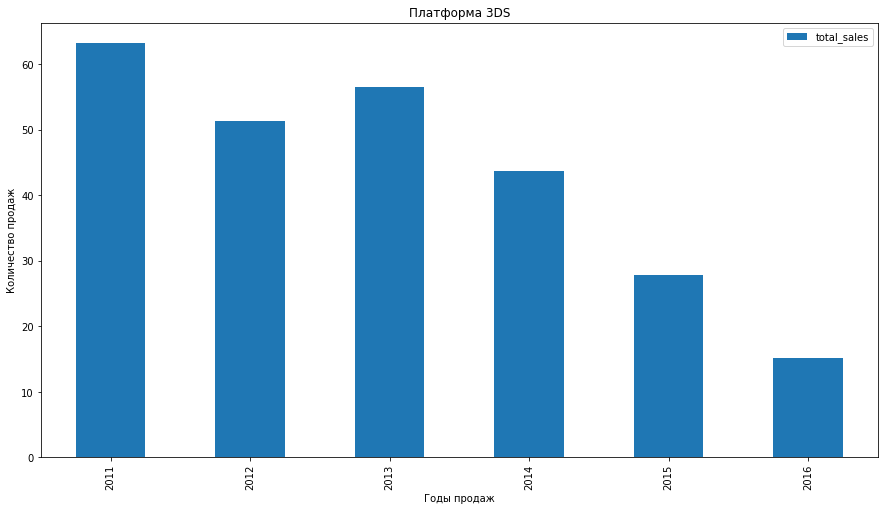

In [22]:
for platform in top_10_platform:
    ax = df[df['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum') \
    .plot(kind='bar', figsize=(15, 8))
    ax.set_title(f'Платформа {platform}')
    ax.set_xlabel('Годы продаж')
    ax.set_ylabel('Количество продаж')

В среднем платформа живёт 10 лет. Это можно объяснить тем, что технологии развиваются каждый день и железо имеет свойство устаревать.

#### Определение актуального периода и лидеров продаж

На мой взгляд, логично взять все данные, начиная с 2005 года, так как именно на этот год приходится резкое повышение продаж видеоигр. Ограничим выборку 2005-2016 годами.

In [23]:
actual_data = df.query('year_of_release >= 2013')

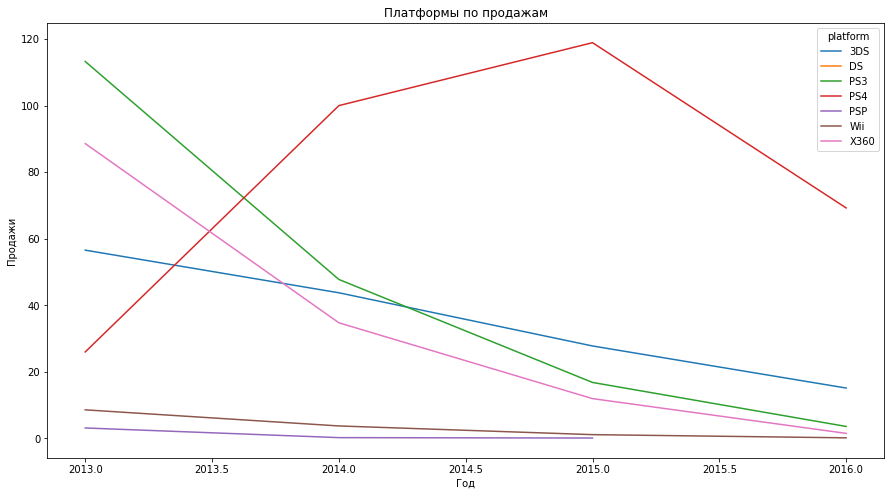

In [24]:
ax = actual_data.query('platform in @top_10_platform') \
.pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum') \
.plot(figsize=(15, 8))
ax.set_title('Платформы по продажам')
ax.set_xlabel('Год')
ax.set_ylabel('Продажи');

Исходя из графика, мы видим, что с течением времени продажи на все платформы снижаются. Более-менее стабильной платформой является **3DS**, которая показывает небольшие, но стабильные продажи. При этом, данная платформа вышла сравнительно недавно и на 2016 год имеет достаточно высокую популярность. Также, прибыльной платформой может являться **PS4**, так как она вышла сравнительно недавно и имеет самые высокие продажи на данный отрезок времени, хоть и с тенденцией к небольшому снижению.

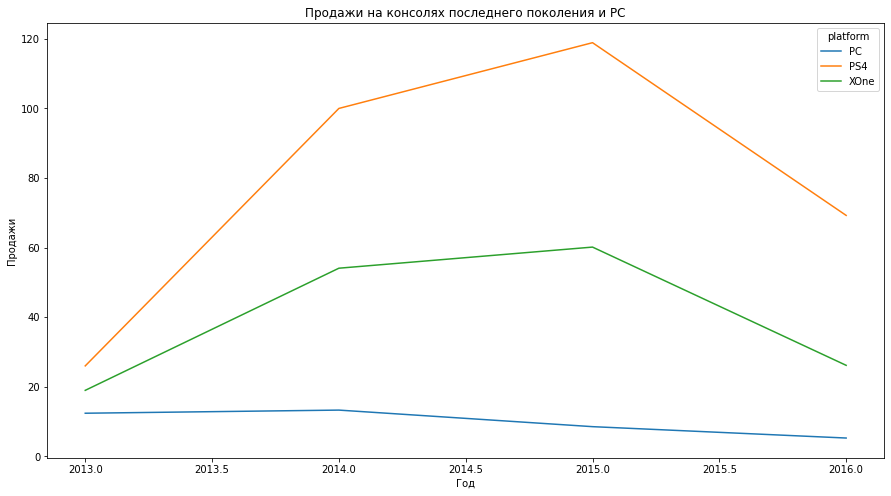

In [25]:
ax = actual_data.query('platform == "PS4" or platform == "XOne" or platform == "PC"') \
.pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum') \
.plot(figsize=(15, 8))
ax.set_title('Продажи на консолях последнего поколения и PC')
ax.set_xlabel('Год')
ax.set_ylabel('Продажи');

Также, отдельно я захотел проанализировать продажи на консолях последнего поколения (на 2016 год) **PS4**, **XOne** и на **PC**, так как именно на этих платформах в основном будут играть пользователи. На графике видно, что продажи на консоли **XOne** ниже, чем на **PS4**, однако данная консоль всё равно популярна и имеет отличные показатели продаж на 2015 год. **PC** хоть и показывает относительно низкие продажи, все же является стабильным источником дохода, который имеет достаточно плавные взлеты и падения, что в лучшую сторону скажется на прибыли в долгосрочной перспективе, так как **PC** может менять свою конфигурацию на более мощную, но при этом ПО и цифровые магазины для него остаются прежними, что избавляет разработчиков и издателей в будущем выпускать версии для новых спецификаций железа.

**Итого самыми потенциально прибыльными платформами являются *PC*, *PS4*, *XOne* и *3DS*.**

#### Глобальные продажи игр в разбивке по платформам

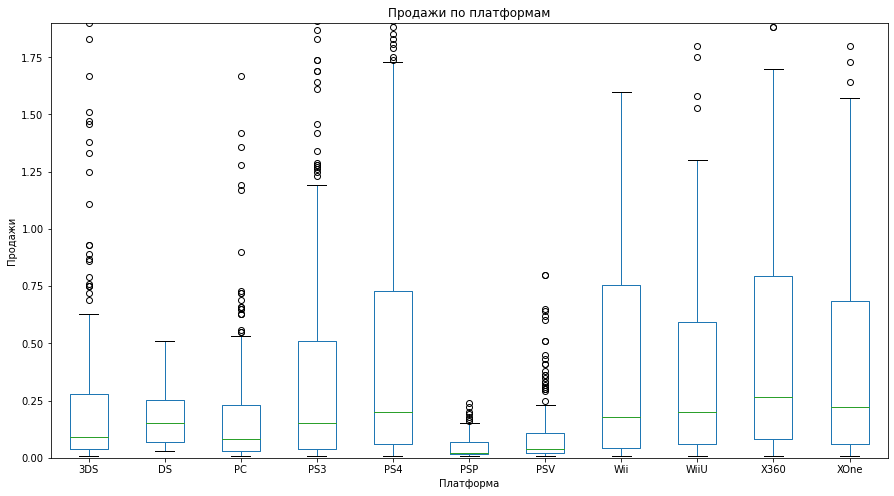

In [26]:
ax = actual_data.pivot_table(index='name', values='total_sales', columns='platform', aggfunc='sum') \
    .plot(kind='box', ylim=(0, 1.9), figsize=(15, 8))
ax.set_title('Продажи по платформам')
ax.set_xlabel('Платформа')
ax.set_ylabel('Продажи');

Из графика "ящик с усами" можно увидеть, что предыдущий вывод относительно платформы **XOne** был верным, так как медианные значения платформ **PS4** и **XOne** совпадают, что означает то, что на данной платформе игры также хорошо продаются.

#### Влияние отзывов пользователей и отзывов критиков на продажи внутри одной популярной платформы

In [27]:
ps4 = actual_data.query('platform == "PS4"')

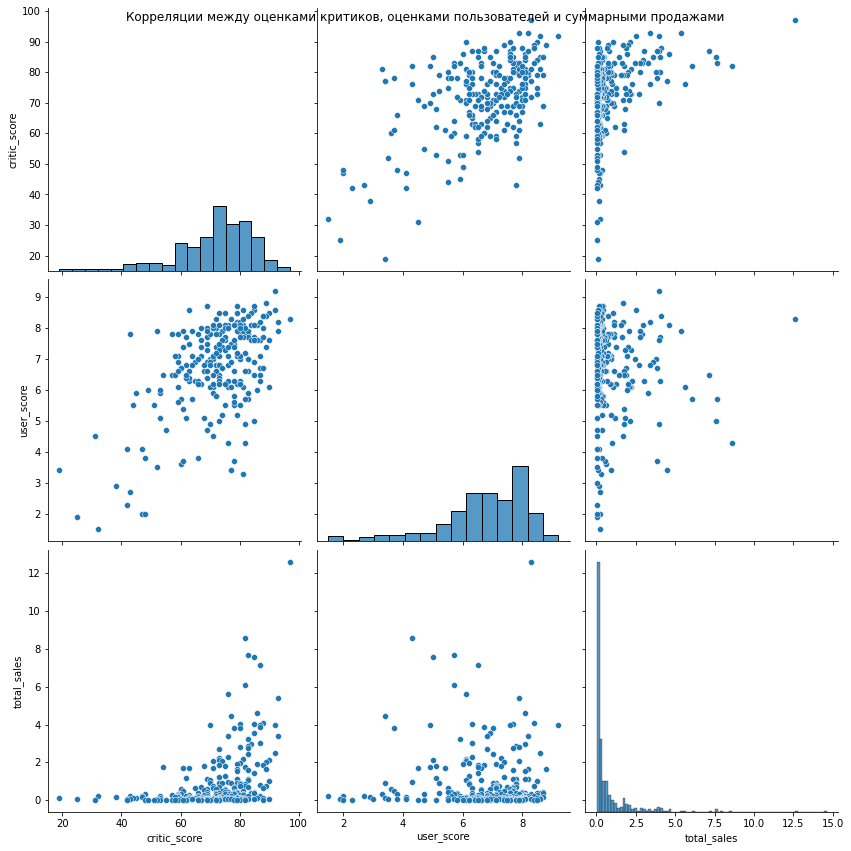

In [28]:
ax = sns.pairplot(ps4[['critic_score', 'user_score', 'total_sales']], height=4)
ax.fig.suptitle('Корреляции между оценками критиков, оценками пользователей и суммарными продажами');

Из графиков рассения в целом видно закономерную картину: **чем выше отзывы критиков и игроков, тем лучше игра продаётся.** Однако, есть аномалии, так как некоторые игры имеют сравнительно низкую оценку, но при этом хорошо продаются.

In [29]:
ps4[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


Из матрицы корреляций видно, что корреляция столбцов **critic_score** и **total_sales** достаточно высока. Именно эту зависимость можно увидеть на графиках выше. Однако, корреляция **user_score** и **total_sales** очень мала, из чего можно сделать вывод, что продажи в большей степени зависят от **отзывов критиков**, а не от **отзывов игроков**.

In [30]:
actual_data[actual_data['platform'] == "XOne"][['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
total_sales,0.416998,-0.068925,1.000000


In [31]:
actual_data[actual_data['platform'] == "PC"][['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.429562,0.196030
user_score,0.429562,1.000000,-0.093842
total_sales,0.196030,-0.093842,1.000000


In [32]:
actual_data[actual_data['platform'] == "3DS"][['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.769536,0.357057
user_score,0.769536,1.000000,0.241504
total_sales,0.357057,0.241504,1.000000


На каждой из выбранной популярных платформ, исходя из матрицы корреляций, можно сделать вывод, что итоговые суммарные продажи в большей степени зависят от **оценок критиков**, а не от **оценок пользователей**.

#### Распределение игр по жанрам

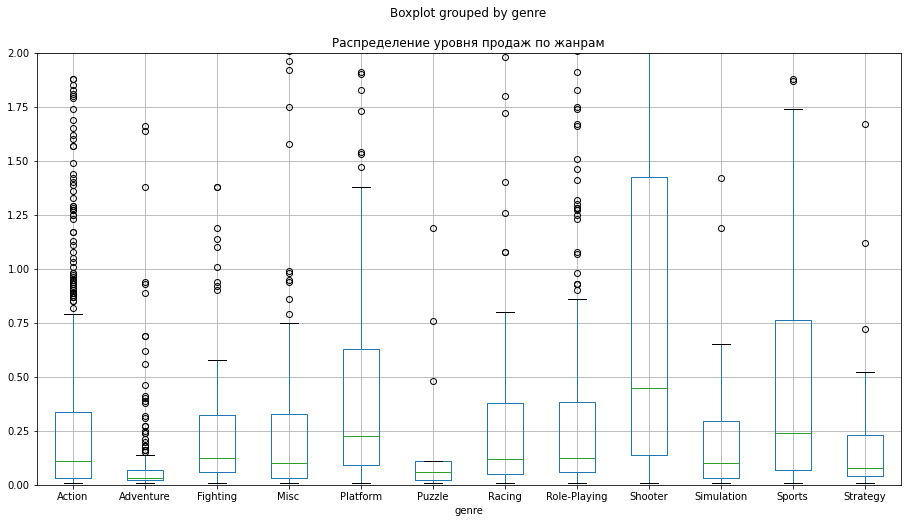

In [33]:
#ax = actual_data.pivot_table(index='genre', values='total_sales', aggfunc='sum') \
#    .sort_values(by='total_sales', ascending=False) \
#    .plot(kind='pie', y='total_sales', figsize=(15, 8))

ax = actual_data[['genre', 'total_sales']].boxplot(by='genre', column='total_sales', figsize=(15, 8))
ax.set_ylim(0, 2)
ax.set_title('Распределение уровня продаж по жанрам');

In [34]:
actual_data.pivot_table(index='genre', values='total_sales', aggfunc='median') \
                        .sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


Самым прибыльным является жанр **Shooter**. Возможно, это связано с тем, что его выпускается больше всего. Самыми непопулярными жанрами стали **Adventure**, **Puzzle** и **Strategy**. Скорее всего это связано с их общей *нишевостью*, и многие игроки не хотят тратить время на то, чтобы, например, разбираться в сложных механиках стратегий. **Adventure** и **Puzzle** сейчас больше привлекательны для казуального сегмента игроков, и в основном превалируют на мобильных устройствах.

**Итоговый вывод по исследовательскому анализу данных:**
- До 1995 года игр выпускалось очень мало. Скорее всего, это связано с малыми мощностями тогдашних систем, плюс сама индустрия видеоигр ещё только зарождалась и не была настолько популярной. Начиная с 2002 года, произошёл резкий скачок в количестве выпускаемых игр, после чего пик держался на промежутке c 2007 по 2011 год. Дальше - спад. На мой взгляд, данные до 1995 года не важны в рамках моего исследования.
- В среднем платформа живёт 10 лет. Это можно объяснить тем, что технологии развиваются каждый день и железо имеет свойство устаревать.
- На мой взгляд, логично взять все данные, начиная с 2005 года, так как именно на этот год приходится резкое повышение продаж видеоигр. Ограничим выборку 2005-2016 годами. Далее мы будем использоваться датасет `actual_data`
- С течением времени продажи на все платформы снижаются. Более-менее стабильной платформой является **3DS**, которая показывает небольшие, но стабильные продажи. При этом, данная платформа вышла сравнительно недавно и на 2016 год имеет достаточно высокую популярность. Также, прибыльной платформой может являться **PS4**, так как она вышла сравнительно недавно и имеет самые высокие продажи на данный отрезок времени, хоть и с тенденцией к небольшому снижению.
- Продажи на консоли **XOne** ниже, чем на **PS4**, однако данная консоль всё равно популярна и имеет отличные показатели продаж на 2015 год. **PC** хоть и показывает относительно низкие продажи, все же является стабильным источником дохода, который имеет достаточно плавные взлеты и падения, что в лучшую сторону скажется на прибыли в долгосрочной перспективе, так как **PC** может менять свою конфигурацию на более мощную, но при этом ПО и цифровые магазины для него остаются прежними, что избавляет разработчиков и издателей в будущем выпускать версии для новых спецификаций железа.
- Корреляция **user_score** и **total_sales** очень мала, из чего можно сделать вывод, что продажи в большей степени зависят от **отзывов критиков**, а не от **отзывов игроков**.
- Самым прибыльным является жанр **Shooter**. Возможно, это связано с тем, что его выпускается больше всего. Самыми непопулярными жанрами стали **Adventure**, **Puzzle** и **Strategy**. Скорее всего это связано с их общей *нишевостью*, и многие игроки не хотят тратить время на то, чтобы, например, разбираться в сложных механиках стратегий. **Adventure** и **Puzzle** сейчас больше привлекательны для казуального сегмента игроков, и в основном превалируют на мобильных устройствах.

### Портреты пользователей каждого региона

**Определите для пользователя каждого региона (NA, EU, JP):**

- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [35]:
regions_list = ['na_sales', 'eu_sales', 'jp_sales']

In [36]:
def draw_plot_by_country(groupby='name', region='na_sales', ax=0):
    sales_pivot = actual_data.groupby(groupby).agg({region: 'sum'}).sort_values(by=region, ascending=False)[:5]
    color_dict = {'na_sales': 'blue', 'eu_sales': 'green', 'jp_sales': 'red'}
    titles_dict = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
    plot = sales_pivot.plot(kind='bar', ax=axes[ax], color=color_dict[region], rot=20, title=titles_dict[region])
    plot.set_xlabel('Платформа')

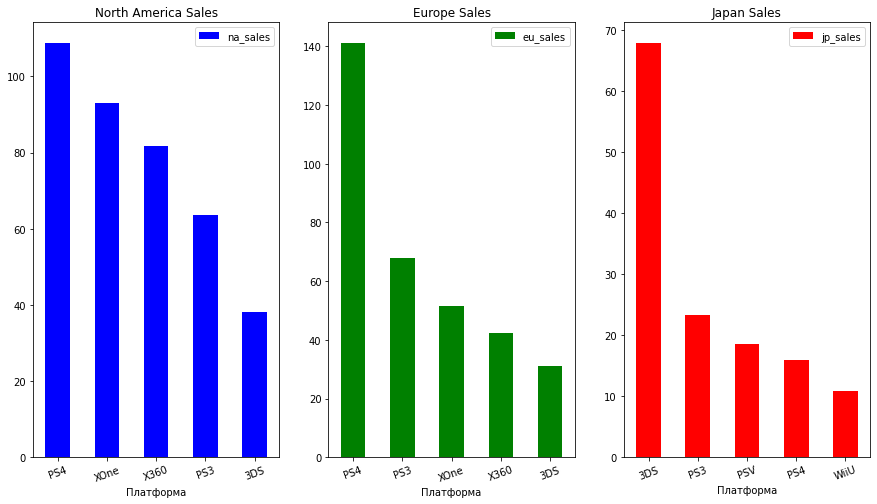

In [37]:
_, axes = plt.subplots(1, 3, figsize=(15, 8))
for i, region in enumerate(regions_list):
    draw_plot_by_country('platform', region, i)

**Самые популярные платформы в Америке (в порядке убывания):**
- PS4
- XOne
- X360
- PS3
- 3DS

**Самые популярные платформы в Европе (в порядке убывания):**
- PS4
- PS3
- XOne
- X360
- 3DS

**Самые популярные платформы в Японии (в порядке убывания):**
- 3DS
- PS3
- PSV
- PS4
- WiiU

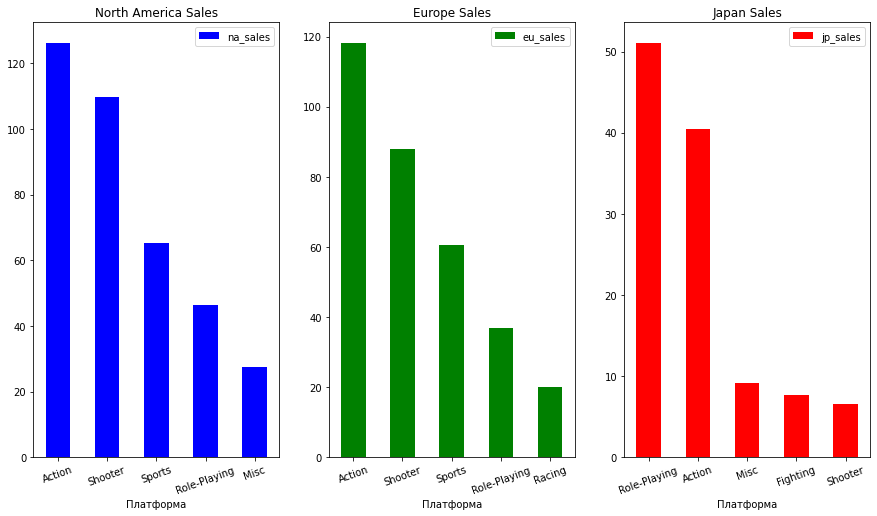

In [38]:
_, axes = plt.subplots(1, 3, figsize=(15, 8))
for i, region in enumerate(regions_list):
    draw_plot_by_country('genre', region, i)

Жанры **Action** и **Sports** преобладают в Америке и в Европе. Скорее всего это связано с тем, что жители этих регионов предпочитают более активный досуг и просто обожают различные виды спорта. В Японии же преобладает жанр **Role-Playing**. Это можно объяснить тем, что менталитет японцев достаточно спокойный и размеренный, поэтому они предпочитают более спокойные игры, где больше нужно использовать тактическое мышление и логику.

In [39]:
ESRB_dict = {
    'E': 'Для всех',
    'EC': 'Для детей старше 3 лет',
    'E10+': 'Для детей от 10 лет и старше',
    'T': 'Подросткам',
    'M': 'Для взрослых',
    'AO': 'Только для взрослых',
    'RP': 'Рейтинг ожидается',
    'pass': 'unknown'
}

In [40]:
actual_data['esrb_describe'] = actual_data[actual_data['rating'].notna()]['rating'].map(ESRB_dict)
actual_data['rating'].value_counts()

pass    977
M       369
T       333
E       302
E10+    252
Name: rating, dtype: int64

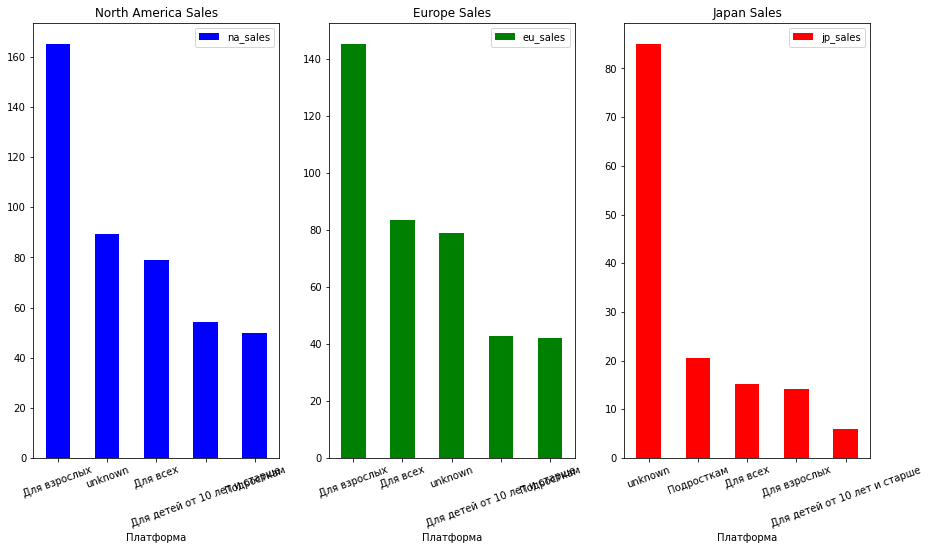

In [41]:
_, axes = plt.subplots(1, 3, figsize=(15, 8))
for i, region in enumerate(regions_list):
    draw_plot_by_country('esrb_describe', region, i)

Для Америки и Европы картина одинаковая - больше всего популярны игры с рейтингом **M (для взрослых).** В Японии же самым популярным является рейтинг "unknown". Скорее всего, это связано с тем, что не все японские игры подлежат сертификации через ESRB.

**Общий вывод по портретам игроков из разных регионов:**
1. Америка
    1. Самые популярные платформы
       - PS4
       - XOne
       - X360
       - PS3
       - 3DS
    2. Самые популярные жанры
       - Action
       - Shooter
       - Sports
       - Shooter
       - Role-Playing
    3. Лучший рейтинг: **M (для взрослых)**
2. Европа
    1. Самые популярные платформы
        - PS4
        - PS3
        - XOne
        - X360
        - 3DS
    2. Самые популярные жанры
        - Action
        - Role-Playing
        - Sports
        - Shooter
        - Racing
    3. Лучший рейтинг: **M (для взрослых)**
3. Япония
    1. Самые популярные платформы
        - 3DS
        - PS3
        - PSV
        - PS4
        - WiiU
    2. Самые популярные жанры
        - Role-Playing
        - Action
        - Fighting
        - Shooter
    3. Лучший рейтинг: неизвестно (большинство игр не требует сертификации ESRB)

### Проверка гипотез

**Гипотезы:**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Пороговое значение alpha определим как 0.05

#### Гипотеза №1

Гипотеза: **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**
- **H0:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- **H1:** Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.

Для формирования гипотез был использован t-критерий Стьюдента.

In [42]:
sample_xone = actual_data[actual_data['platform'] == 'XOne']['user_score'].dropna()
sample_pc = actual_data[actual_data['platform'] == 'PC']['user_score'].dropna()

alpha = .05

results = st.ttest_ind(
    sample_xone,
    sample_pc,
    equal_var=True
)

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


В результате мы не отвергаем нулевую гипотезу.

#### Гипотеза №2

Гипотеза: **Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

- **H0**: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
- **H1**: Средние пользовательские рейтинги жанров Action и Sports разные.

Для формирования гипотез был использован t-критерий Стьюдента.

In [43]:
sample_action = actual_data[actual_data['genre'] == 'Action']['user_score'].dropna()
sample_sports = actual_data[actual_data['genre'] == 'Sports']['user_score'].dropna()

alpha = .05

results = st.ttest_ind(
    sample_action,
    sample_sports,
    equal_var=False
)

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.4460039700704315e-20
Отвергаем нулевую гипотезу


В результате мы отвергли нулевую гипотезу.

### Общий вывод

1. Импорт необходимых модулей и загрузка датасета
    - Были импортированы необходимые модули (pandas, matplotlib, numpy, seasborn, scipy)
    - Был импортирован датасет *games.csv*
2. Первоначальная обработка данных
    - Все названия колонок были приведены к нижнему регистру
    - Было удалено 273 пропуска, что составило 1.62% данных
    - Тип столбца `year_of_release` был изменет на **int**
    - Тип столбца `user_score` был изменен на **float**
    - Была добавлена новая колонка `total_sales`, которая содержит в себе сумму всех продаж по всем регионам
    - Пропуски в столбцах `critic_score` и `user_score`на данном этапе восполнить не представляется возможным, так как игра могла выйти недавно и не ещё не набрала достаточное количество отзывов; имела место быть техническая ошибка, которая не позволила корректно загрузить данные; заполнить медианным или средним значением также не представляется возможным, так как на этапе предобработки неизвестна зависимость между данными столбцами.
    - Был удалён 1 неявный дубликат
    - Все пропуски в столбце `rating` были временно заменены на **pass**
3. Исследовательский анализ данных
    - До 1995 года игр выпускалось очень мало. Скорее всего, это связано с малыми мощностями тогдашних систем, плюс сама индустрия видеоигр ещё только зарождалась и не была настолько популярной. Начиная с 2002 года, произошёл резкий скачок в количестве выпускаемых игр, после чего пик держался на промежутке c 2007 по 2011 год. Дальше - спад. На мой взгляд, данные до 1995 года не важны в рамках моего исследования.
    - В среднем платформа живёт 10 лет. Это можно объяснить тем, что технологии развиваются каждый день и железо имеет свойство устаревать.
    - На мой взгляд, логично взять все данные, начиная с 2005 года, так как именно на этот год приходится резкое повышение продаж видеоигр. Ограничим выборку 2005-2016 годами. Далее мы будем использоваться датасет `actual_data`
    - С течением времени продажи на все платформы снижаются. Более-менее стабильной платформой является **3DS**, которая показывает небольшие, но стабильные продажи. При этом, данная платформа вышла сравнительно недавно и на 2016 год имеет достаточно высокую популярность. Также, прибыльной платформой может являться **PS4**, так как она вышла сравнительно недавно и имеет самые высокие продажи на данный отрезок времени, хоть и с тенденцией к небольшому снижению.
    - Продажи на консоли **XOne** ниже, чем на **PS4**, однако данная консоль всё равно популярна и имеет отличные показатели продаж на 2015 год. **PC** хоть и показывает относительно низкие продажи, все же является стабильным источником дохода, который имеет достаточно плавные взлеты и падения, что в лучшую сторону скажется на прибыли в долгосрочной перспективе, так как **PC** может менять свою конфигурацию на более мощную, но при этом ПО и цифровые магазины для него остаются прежними, что избавляет разработчиков и издателей в будущем выпускать версии для новых спецификаций железа.
    - Корреляция **user_score** и **total_sales** очень мала, из чего можно сделать вывод, что продажи в большей степени зависят от **отзывов критиков**, а не от **отзывов игроков**.
    - Самым прибыльным является жанр **Shooter**. Возможно, это связано с тем, что его выпускается больше всего. Самыми непопулярными жанрами стали **Adventure**, **Puzzle** и **Strategy**. Скорее всего это связано с их общей *нишевостью*, и многие игроки не хотят тратить время на то, чтобы, например, разбираться в сложных механиках стратегий. **Adventure** и **Puzzle** сейчас больше привлекательны для казуального сегмента игроков, и в основном превалируют на мобильных устройствах.
4. Портреты игроков из разных регионов
    1. Америка
        1. Самые популярные платформы
           - PS4
           - XOne
           - X360
           - PS3
           - 3DS
        2. Самые популярные жанры
           - Action
           - Shooter
           - Sports
           - Shooter
           - Role-Playing
        3. Лучший рейтинг: **M (для взрослых)**
    2. Европа
        1. Самые популярные платформы
            - PS4
            - PS3
            - XOne
            - X360
            - 3DS
        2. Самые популярные жанры
            - Action
            - Role-Playing
            - Sports
            - Shooter
            - Racing
        3. Лучший рейтинг: **M (для взрослых)**
    3. Япония
        1. Самые популярные платформы
            - 3DS
            - PS3
            - PSV
            - PS4
            - WiiU
        2. Самые популярные жанры
            - Role-Playing
            - Action
            - Fighting
            - Shooter
        3. Лучший рейтинг: неизвестно (большинство игр не требует сертификации ESRB)
5. Проверка гипотез
    - Гипотеза **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые** - не была отвергнута
    - Гипотеза **Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»)** разные - отвергнута